## Supervised Classification Pipeline to Classify Emails as Spam or Non-spam

### 1.0. Introduction
The primary goal of the report is to create a supervised classification pipeline to classify emails as spam or non-spam. The dataset that we will use is the Enron email dataset.  The dataset is a collection of public domain emails from the Enron corporation that have been manually classified as spam and non-spam. The full dataset on the web here: http://www.aueb.gr/users/ion/data/enron-spam/.

The steps that will be undertaken are as follows:
- Preprocess and clean the dataset
- Exploratory data analysis
- Supervised classification 
- Model selection
- Model evaluation

##### 1.1. Importing Libraries

To create the model, a number of library that will be used have to be imported into the notebook.

In [21]:


#import libraries for data analysis and visualisation
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


#import libraries from skicit Learn for model building and evaluation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#import NLTK libraries for stop words removal, tokenization and punctuation removal
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation



##### 1.2. Importing Data
Enron 1 the dataste provided was used in this project. The dataset which contained folders with email files was imported by reading  each email file into a pandas data frame.<br>

A Python dictionary with two keys: 'text' and 'label', both initially empty lists is created. This dictionary is used to store the email data and labels.

The code then loops through each file in the spam_path directory using os.listdir(spam_path). For each file, it reads the content of the file using with open(...) and appends it to the 'text' list in the data dictionary using data ['text'].append(file.read()). It also appends the label '1' to the 'label' list using data['label'].append(1).

The same process is repeated for the ham_path directory in the next for loop. The content of each file is read and appended to 'text' list of the data dictionary using data['text'].append(file.read()). It also appends the label '0' to the 'label' list using data['label'].append(0).

Finally,using pd.DataFrame(data) a Pandas DataFrame called 'emails' is created with two columns: 'text' and 'label'. The 'text' column contains the text content of the emails, and the 'label' column contains the corresponding label (0 for ham, 1 for spam).

The last line emails.shape returns the shape of the DataFrame, which shows that it has 5172 emails emails and 2 columns.



In [2]:
# Define dataset path
spam_path = "enron1/spam"
ham_path = "enron1/ham"

# Load the data into a Pandas DataFrame with the email body as text and label spam or ham as 'label'.
#spam emails are assigned label 1 while ham emails are assigned 0
#create 
data = {'text': [], 'label': []}

for filename in os.listdir(spam_path):
    with open(os.path.join(spam_path, filename), 'r', encoding='utf-8', errors='ignore') as file:
        data['text'].append(file.read())
        data['label'].append(1)

for filename in os.listdir(ham_path):
    with open(os.path.join(ham_path, filename), 'r', encoding='utf-8', errors='ignore') as file:
        data['text'].append(file.read())
        data['label'].append(0)

emails = pd.DataFrame(data)

emails.shape #5172 rows × 2 columns

#display imported emails 
emails # 5172 emails

#Source: https://www.youtube.com/watch?v=N-hJTaM9dEI
        


,text,label
0,Subject: dobmeos with hgh my energy level has ...,1
1,Subject: your prescription is ready . . oxwq s...,1
2,Subject: get that new car 8434\npeople nowthe ...,1
3,"Subject: await your response\ndear partner ,\n...",1
4,"Subject: coca cola , mbna america , nascar par...",1
...,...,...
5167,Subject: re : tenaska iv\ni ' ll call you on t...,0
5168,"Subject: generic contract\nhi daren ,\nsorry f...",0
5169,Subject: re : contracts and credit\nthanks - -...,0
5170,"Subject: re : tenaska iv\nok , since we don ' ...",0


In [3]:
#check number of rows and columns
emails.shape 
#5172 rows × 2 columns


(5172, 2)

###### Plot bar charts of spam and ham emails
Bar plots are created using sns.countplot function from seaborn. Based on the above bar chart below, spam emails are only 29 percent of the data as compared to non-spam emails which are 71 percent. This is an imbalanced dataset that can cause bias and affect model performance in classifying the spam emails. This is a key issues that has to be dealt with.

Text(0.5, 1.0, 'Bar charts of spam and ham emails')

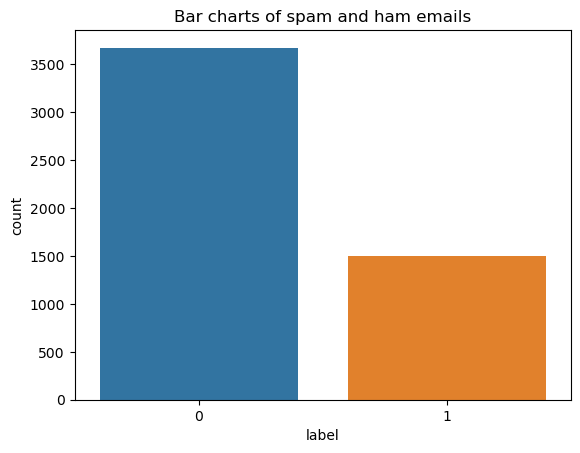

In [6]:
#Plot bar charts of spam and ham emails
sns.countplot(x="label", data = emails)
plt.title('Bar charts of spam and ham emails')
#0 - non spam emails, 1 - spam emails

In [7]:
#calculate the proportion of spam and ham emails

print('Proportion of Non-Spam and Spam emails: ')
print(emails.label.value_counts() / len(emails))

#71% of the data is non-spam and 29% od spam emails

Proportion of Non-Spam and Spam emails: 
0    0.709977
1    0.290023
Name: label, dtype: float64


##### Handling imbalance
To deal with the imbalance in the classes, we downsample to balance the dataset.

The first two lines of code create two separate dataFrames, NonSpam and Spam, by filtering the emails DataFrame for non-spam and spam emails, respectively. The next line downsamples the NonSpam DataFrame by randomly selecting len(Spam) rows from it using  sample method, and len(Spam) is the number of rows in the Spam DataFrame. This ensures that the NonSpam DataFrame has the same number of rows as the Spam DataFrame.

The append function combines the downsampled NonSpam and Spam data frames into a new data frame called balanced_data. The reset_index function is then called to reset the index of balanced_data to start at 0.

Matplotlib and seaborn libraries are then used to create a bar chart of the count of non-spam and spam emails in balanced_data. 

The dataset reduced to only 3000 observations which might not effectively train the model given that it has to be split inro train, validation and test sets.<br> 
One of the limitations of the study was a machine that couldnt process very large files.
With a GPU i could have utilised the other 5 enron datasets to have a larger sample size after down sampling. This would have provided a larger dataset for training the model.

Given this limitation, the imbalance is noted but will be considered during model building and intepretation of results.

(3000, 2)


C:\Users\babir\AppData\Local\Temp\ipykernel_35232\494074059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = NonSpam.append(Spam).reset_index(drop = True)
C:\Users\babir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Emails types')

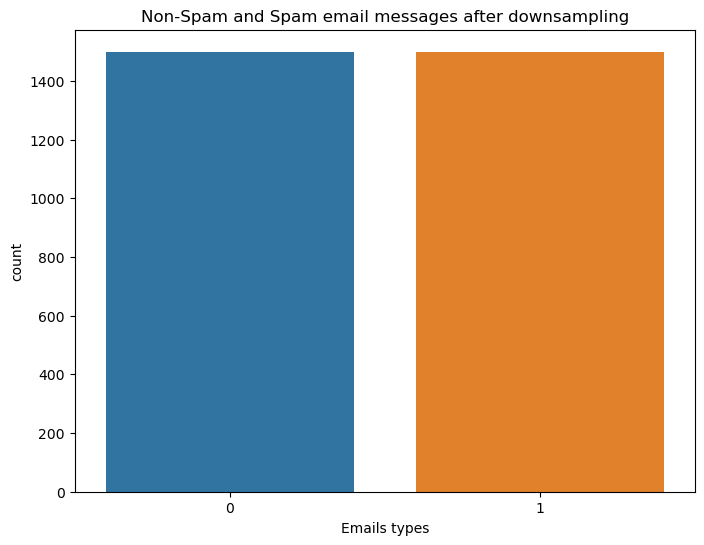

In [8]:
# Downsampling to balance the dataset
NonSpam = emails[emails.label == 0]
Spam = emails[emails.label == 1]
NonSpam = NonSpam.sample(n = len(Spam), random_state=10)
 
# Plotting the counts of down sampled dataset
balanced_data = NonSpam.append(Spam).reset_index(drop = True)
print(balanced_data.shape)
plt.figure(figsize = (8, 6))
sns.countplot(balanced_data.label)
plt.title('Non-Spam and Spam email messages after downsampling')
plt.xlabel('Emails types')

#Source: https://www.geeksforgeeks.org/detecting-spam-emails-using-tensorflow-in-python/

### 2.0. Data Pre-Processing and Cleaning

This section details the process of data cleaning including removing duplicates and missing data, as well as removing features that might affect model performance such as stop words. Features were also extracted from the data and the data  was also split into training and test data. 

##### 2.1. Removing Duplicates:
The drop_duplicates function was used to remove duplicates.
The data contained some duplicates therefore some duplicates removed, reducing the data from 5172 to 4994 observations/emails.

In [9]:
#Check for duplicates
emails.drop_duplicates(inplace = True)


#check for new number of observations
emails.shape 
# There were some duplicates as the number of observations reduced to 4994

(4994, 2)

##### 2.2. Missing Data:
Missing data was checked for using the isnull function.
The data doesnt have any missing values in both text and label columns 


In [10]:
# check for missing data in the columns

emails.isnull().sum()


text     0
label    0
dtype: int64

##### 2.3. Data Cleaning


To clean the data, the stop words were removed, the text was converted to lowercase, and punctuation and digits in the emails was removed. The stop words are words that might not provide meaningful contribution to the model's ability to classify.

In [11]:
import string
import nltk
nltk.download('stopwords')

# Define the stop words and punctuation lists 
punc_list = string.punctuation           # Punctuation list
sw_list = nltk.corpus.stopwords.words('english')     # Stopwords list

# Remove special characters, digits, and www
emails['text'] = emails['text'].str.replace('\d+', '')  # remove digits
emails['text'] = emails['text'].str.replace('www\.[^\s]+', '')  # remove www
#emails['text'] = emails['text'].str.replace('\s+', ' ')  # remove extra spaces

# Remove punctuation and stop words
emails['text'] = emails['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (punc_list)]))
emails['text'] = emails['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_list)]))

# Convert text to lowercase
emails['text'] = emails['text'].str.lower()

#view the clean data

emails


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\babir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\babir\AppData\Local\Temp\ipykernel_35232\4290805804.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  emails['text'] = emails['text'].str.replace('\d+', '')  # remove digits
C:\Users\babir\AppData\Local\Temp\ipykernel_35232\4290805804.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  emails['text'] = emails['text'].str.replace('www\.[^\s]+', '')  # remove www


,text,label
0,subject: dobmeos hgh energy level gone stukm i...,1
1,subject: prescription ready oxwq f e low cost ...,1
2,subject: get new car people nowthe weather cli...,1
3,subject: await response dear partner team gove...,1
4,subject: coca cola mbna america nascar partner...,1
...,...,...
5167,subject: tenaska iv call thursday good time or...,0
5168,subject: generic contract hi daren sorry delay...,0
5169,subject: contracts credit thanks include maste...,0
5170,subject: tenaska iv ok since appear able hook ...,0


In [12]:
# the  data still contains the word subject and semi colons which will not add value as it is usually at the begining of both spam and ham emails
#These are removed from the data 
emails['text'] = emails['text'].str.replace('subject:', ' ')  # remove digits
#emails


##### Visualise the emails data using a Word cloud

The most common words in the spam emails are; product, one,new, need,nbsp,service,pills and u. In the non-spam emails, the most frequent words include; hou, ect, corp, enron, farmer, subject, cc, deal, let, know and meter.

In [13]:


#!pip install wordcloud

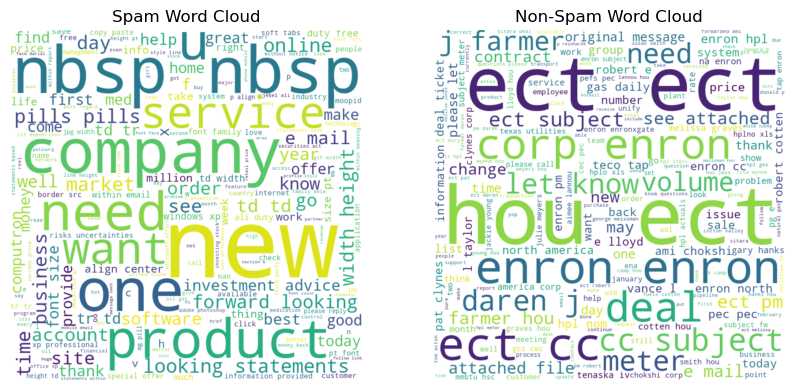

In [14]:


# Separate spam and non-spam emails
spam_emails = emails[emails['label'] == 1]['text']
ham_emails = emails[emails['label'] == 0]['text']

# Create word cloud for spam emails
spam_text = ' '.join(spam_emails)
spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(spam_text)

# Create word cloud for non-spam emails
ham_text = ' '.join(ham_emails)
ham_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(ham_text)

# Visualize the word clouds
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(spam_wordcloud, interpolation='bilinear')
axs[0].set_title('Spam Word Cloud')
axs[0].axis('off')
axs[1].imshow(ham_wordcloud, interpolation='bilinear')
axs[1].set_title('Non-Spam Word Cloud')
axs[1].axis('off')
plt.show()

#Source:https://medium.com/@tanerant/e-mail-classification-nlp-d7d7dfd76d8e
        


##### 2.4. Split the Data into train,validation and test set
The data was split into training, validation and testing sets in preparation for model building with a random state of 42 for reproducibility. 
To take appropriate measures to ensure that the test set is not biased in any way,random shuffling and stratified sampling are used. Number of emails in the train, validation and test sets are; 2,496, 999 and 1,499 respectively. Based on that data, the train set has 49.98 percent of the emails data while the test set has 30.02 percent of the emails data.<br> 
To ensure that there's no bias in te test set the train and test set have the same proportion of spam and non-spam emails (70.70%  and 29.30%) respectively.


In [15]:
# the data is split into training and testing sets 
# To take appropriate measures to ensure that the test set is not biased in any way,random shuffling and stratified sampling are used
X_train_plus_valid, X_test, y_train_plus_valid, y_test = train_test_split(emails['text'], emails['label'], test_size=0.3, random_state=42, shuffle=True, stratify=emails['label'])

In [16]:
#Split the training data into a training set and a validation set, 
#X_train_plus_valid, X_test, y_train_plus_valid, y_test = train_test_split(emails['text'], emails['label'], random_state=42, train_size = 0.7,shuffle=True, stratify=emails['label'])


X_train, X_valid, y_train, y_valid = train_test_split(X_train_plus_valid, y_train_plus_valid, random_state=42, train_size = 0.5/0.7 )

In [17]:
## Count the number of emails in the train and test data
train_emails_count = len(X_train)
valid_emails_count = len(X_valid)
test_emails_count = len(X_test)

print('Number of emails in the train set:', train_emails_count)
print('Number of emails in the validation set:', valid_emails_count)
print('Number of emails in the test set:', test_emails_count)

Number of emails in the train set: 2496
Number of emails in the validation set: 999
Number of emails in the test set: 1499


In [18]:
##calculate the proportion of spam and ham emails in the train and test sets

# Calculate the proportion of emails in train and test sets
train_prop = len(X_train) / len(emails)
valid_prop = len(X_valid)/ len(emails)
test_prop = len(X_test) / len(emails)


print("Proportion of emails in train set: {:.2%}".format(train_prop))
print("Proportion of emails in test set: {:.2%}".format(test_prop))


Proportion of emails in train set: 49.98%
Proportion of emails in test set: 30.02%


The train and test set have the same proportion of spam and non-spam emails.<br>
Train set:
- Proportion of spam emails:29.30%
- Proportion of non-spam emails:70.70% <br>

Test set:
- Proportion of spam emails:29.29%
- Proportion of non-spam emails:70.71%

In [19]:
# Proportion of spam and non-spam emails in train set
train_spam_prop = sum(y_train == 1) / len(y_train)
train_nonspam_prop = sum(y_train == 0) / len(y_train)

#Proportion of spam and non-spam emails in train set
valid_spam_prop = sum(y_valid == 1) / len(y_valid)
valid_nonspam_prop = sum(y_valid == 0) / len(y_valid)


# Proportion of spam and non-spam emails in test set
test_spam_prop = sum(y_test == 1) / len(y_test)
test_nonspam_prop = sum(y_test == 0) / len(y_test)

# Print the results
print("Train set:")
print("Proportion of spam emails:{:.2%}".format (train_spam_prop))
print("Proportion of non-spam emails:{:.2%}".format(train_nonspam_prop))
print()

print("Validation set:")
print("Proportion of spam emails:{:.2%}".format (valid_spam_prop))
print("Proportion of non-spam emails:{:.2%}".format(valid_nonspam_prop))
print()


print("Test set:")
print("Proportion of spam emails:{:.2%}".format(test_spam_prop))
print("Proportion of non-spam emails:{:.2%}".format(test_nonspam_prop))


Train set:
Proportion of spam emails:29.49%
Proportion of non-spam emails:70.51%

Validation set:
Proportion of spam emails:28.83%
Proportion of non-spam emails:71.17%

Test set:
Proportion of spam emails:29.29%
Proportion of non-spam emails:70.71%


##### 2.5. Feature Extraction 

Feature extraction was done using TF-IDF(Term Frequency-Inverse Document Frequency) Vectorizer. It converts the text data into features that are suitable input for a machine learning classifier model. 

In [22]:
# Feature extraction using TfidfVectorizer 

# Initialize a TfidfVectorizer object: vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Transform the  training data: tfidf_X_train 
tfidf_X_train = vectorizer.fit_transform(X_train)

# Transform the validation data: tfidf_X_valid 
tfidf_X_valid = vectorizer.transform(X_valid)


# Transform the test data: tfidf_X_test 
tfidf_X_test = vectorizer.transform(X_test)


# Print the first 10 features
print(vectorizer.get_feature_names_out()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_X_train.A[:5])

#Source: https://campus.datacamp.com/courses/introduction-to-natural-language-processing-in-python/building-a-fake-news-classifier?ex=6

['aa' 'aaas' 'aac' 'aachecar' 'aaer' 'aaiabe' 'aaigrcrb' 'aaldano'
 'aalland' 'aambique']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 3.0 Exploratoty Data Analysis (Train Data set)

##### 3.1. Word Cloud for Spam and Non-Spam emails <br>
The Figures below show word clouds of spam and non-spam emails.The words appearing most frequently in the spam emails include;new, company,u, product, one, business,service, want, height and width. In the non-spam emails, the most frequent words are; hou, ect,deal, enron, meter, cc, subject,volume, daren and corp. The spam email words clearly look like words in a typical spam email and they differ to a large extent from the words in the non-spam emails. This will make classification easier.


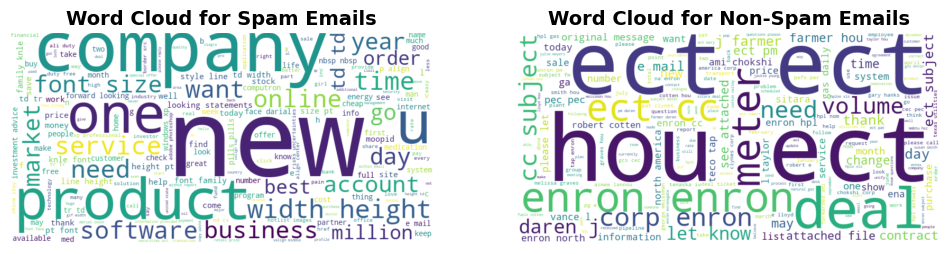

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create word cloud for spam emails in the training set
spam_train = X_train[y_train==1]
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_train))

# Create word cloud for non-spam emails in the training set
nonspam_train = X_train[y_train==0]
nonspam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(nonspam_train))

# Display the two word clouds side by side
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
axs[0].imshow(spam_wordcloud, interpolation='bilinear')
axs[0].set_title('Word Cloud for Spam Emails', fontsize=14, fontweight='bold')
axs[0].axis('off')

axs[1].imshow(nonspam_wordcloud, interpolation='bilinear')
axs[1].set_title('Word Cloud for Non-Spam Emails', fontsize=14, fontweight='bold')
axs[1].axis('off')

plt.show()


##### 3.2. Frequently Occuring Words in Spam and Non-SPam emails

To get a clearer picture of the most frequesnt words in spam and non-spam emails, bar plots are used to visualize the top 20 frequently used words for spam and non-spam emails in the training dataset. The CountVectorizer function from the scikit-learn library is used to converts the text to a matrix of token counts. From the bar plot, the spam emails' most frequent words include;com,http,font, company and www. For the non-spam emails, the most common words include; ect, hou, enron, gas and subject. Most of the frequent words in the respective emails (spam and non-spam) are easily distinguishable as spam and not-spam.

C:\Users\babir\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


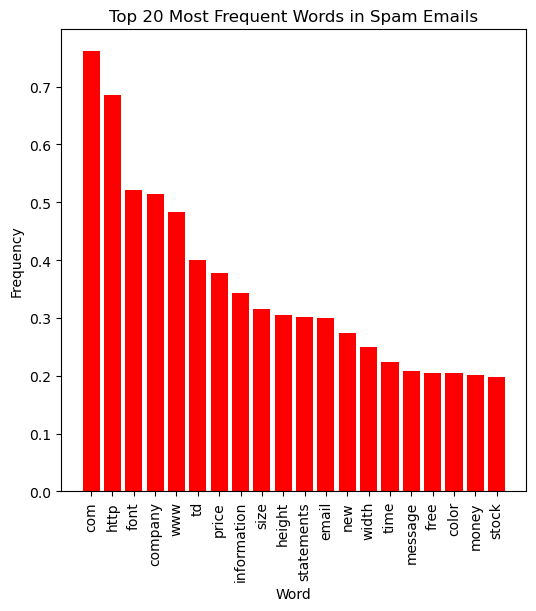

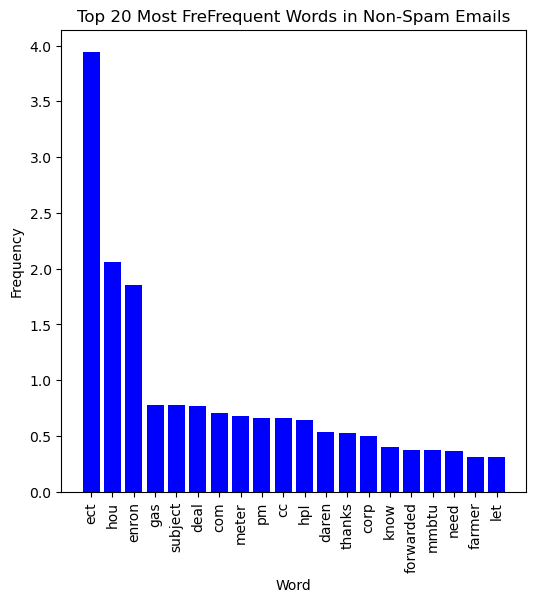

In [24]:

# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer to the training data
X_train_counts = vectorizer.fit_transform(X_train)

# Convert to a DataFrame
X_train_df = pd.DataFrame(X_train_counts.toarray(), columns=vectorizer.get_feature_names())

# Reset the index of the DataFrame and the boolean 
X_train_df = X_train_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Create a boolean for spam emails
spam_bool = y_train == 1

# Get the sum of each word in spam emails
spam_word_counts = X_train_df[spam_bool].sum()

# Sort the word counts in descending order and get the top 20 most frequent words
top_spam_words = spam_word_counts.sort_values(ascending=False)[:20]

# Create a boolean for non-spam emails
ham_bool = y_train == 0

# Get the sum of each word in non-spam emails
ham_word_counts = X_train_df[ham_bool].sum()

# Sort the word counts in descending order and get the top 20 most frequent words
top_ham_words = ham_word_counts.sort_values(ascending=False)[:20]

# Create a bar plot of the top 20 most frequent words in spam emails
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(top_spam_words.index, top_spam_words.values/X_train_df[spam_bool].shape[0], color='red')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Frequent Words in Spam Emails')
plt.xticks(rotation=90)
plt.show()

# Create a bar plot of the top 20 most frequent words in non-spam emails
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(top_ham_words.index, top_ham_words.values/X_train_df[ham_bool].shape[0], color='blue')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most FreFrequent Words in Non-Spam Emails')
plt.xticks(rotation=90)
plt.show()


##### 3.3. Distribution of email lengths 

The distribution of email lengths of both spam and non-spam emails are almost the same with both generally having email length below 250 words as seen in the figure below. However, they both have a big number of outliers. The spam emails generally have outliers with much longer emails. This is a very likely accurrence in spam emails since there are instances when the emails are used for trying to market products or give convincing stories to lure people into a particular deal or to click a link. In addition, the length of both emails might be similar because spammers try to make their emails long in order to look legitimate or look like a non-spam email. That said, the email length might not be a good feature to distinguish between spam and non spam emails in this dataset.

C:\Users\babir\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


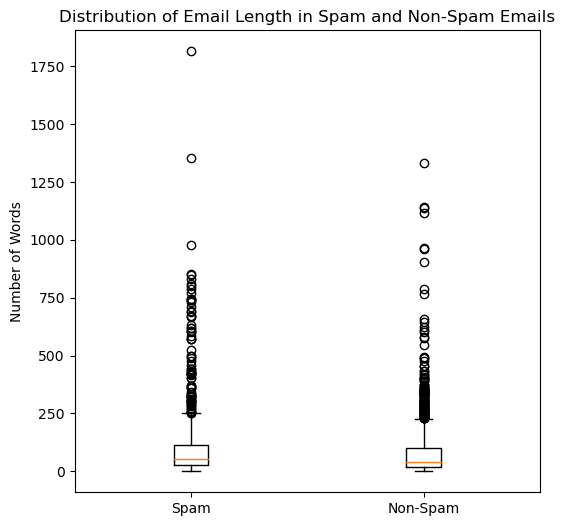

In [25]:


# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer to the training data
X_train_counts = vectorizer.fit_transform(X_train)

# Convert to a DataFrame
X_train_df = pd.DataFrame(X_train_counts.toarray(), columns=vectorizer.get_feature_names())

# Reset the index of the DataFrame and the boolean 
X_train_df = X_train_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Create a boolean for spam emails
spam_mask = y_train == 1

# Count the number of words in each spam email
spam_word_counts = X_train_df[spam_mask].apply(lambda x: x.sum(), axis=1)

# Create a boolean for non-spam emails
ham_mask = y_train == 0

# Count the number of words in each non-spam email
ham_word_counts = X_train_df[ham_mask].apply(lambda x: x.sum(), axis=1)

# Create a box plot of the word counts for spam and non-spam emails
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot([spam_word_counts, ham_word_counts])
ax.set_xticklabels(['Spam', 'Non-Spam'])
ax.set_ylabel('Number of Words')
ax.set_title('Distribution of Email Length in Spam and Non-Spam Emails')
plt.show()


### 4.0. Supervised Classification

###### 4.1. Model Training

Training is done using the multinomial naive Bayes classifier. validation is done using a validation set to check the accuracy of the model. The Multinomial Naive Bayes model has an accuracy of  90 percent. This will be compared with other models in order to select the best model.

In [38]:
# Import the required modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold


# Multinomial Naive Bayes classifier as nb_classifier
nb_classifier = MultinomialNB()

# create and train a Naive Bayes Classifier
nb_classifier.fit(tfidf_X_train, y_train)


MultinomialNB()

##### 4.2. Model performance on validation set

Based on the performance metrics, the model accuracy is 91 percent. However, since we are dealing with a biased model, this performance may be due to correct classification of the majority class. Other metrics such as precision and recall provide a better picture of the performance. <br>

Precision indicates what proportion of positive identifications was actually correct, while recall indicates the  proportion of actual positives that was identified correctly. The precision and recall for the spam emails was 99 percent and 69 percent respectively. This indicates that of the  of the  emails that were classified as spam, 99 percent were actually spam emails which  is good performance. However, the recall is low, as only 69 percent of the spam emails were correctly classified as seen in the confusion matrix. This is likely due to the bias in the dataset as it has a much lower number of spam emails. This can be corrected by down sampling the non-spam class if you have a large enough dataset.<br>

With regard to the non-spam emails, precision is 89 percent while recall is 100 percent which is relatively good performance as compared to spam emails performance. This means that 100 percent of the non-spam emails were classified correctly. In addiiton, the precision means that of the 89 percent of the emails classified as non-spam were correctly classified.<br>

The F1-score takes into account both the precision and recall. The closer it is to 1, the better the model. This naive bayes classifier has an F1.score of 0.94 for non-spam emails and 0.81 for spam emails. It is a better model for predicting non-spam emails .




In [39]:
#check model performance the model on validation set

# Predict on the validation set and calculate accuracy score and confusion matrix

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

pred = nb_classifier.predict(tfidf_X_valid)
print(classification_report(y_valid,pred))

print()

print('Confusion Matrix: \n', confusion_matrix(y_valid,pred, labels = [0, 1] ))

print()

print('Accuracy:', accuracy_score(y_valid,pred))

#Source:https://www.youtube.com/watch?v=cNLPt02RwF0&t=1936s

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       711
           1       0.99      0.69      0.81       288

    accuracy                           0.91       999
   macro avg       0.94      0.84      0.88       999
weighted avg       0.92      0.91      0.90       999


Confusion Matrix: 
 [[710   1]
 [ 90 198]]

Accuracy: 0.908908908908909


The Model has an AUc of 0.84 which is relatively far from one. In addition, the ROC curve indicates a reasonably large distance from the top left corner with a true positive rate of 0.69. This model's performance is not very good. Different steps will be taken to try and improve the model's performance.

Text(0.5, 1.0, 'ROC Curve for Naive Bayes Classifier')

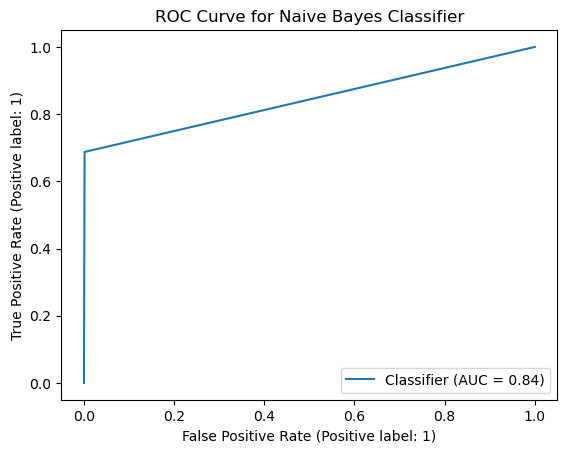

In [40]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_valid,pred)
plt.title('ROC Curve for Naive Bayes Classifier')

#Source: sklearn website


<b>Confusion Matrix:</b><br>
The confusion matrix shows that of all the 711 non-spam emails 710 were classified correctly (almost 100%) and only 1 was wrongly classified. With regard to the spam emails, 198 were correctly classified (70%) while 90 were wrongly classified. This is a big number of mis-classified emails given the number of spam emails. The model's classification of spam emails is not adequate.

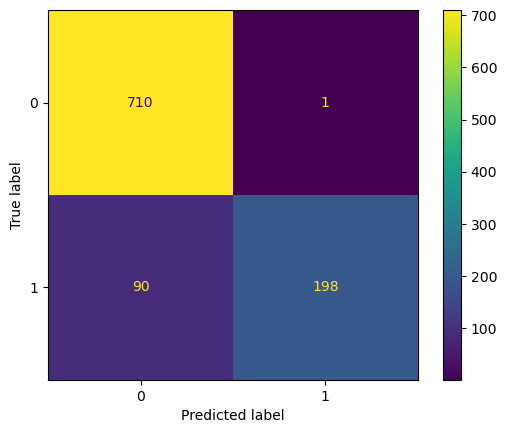

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_predictions(y_valid,pred)
plt.show()




In [42]:
#Saving the model to the disk using Pickle
import pickle

with open('model_NB', 'wb') as files:
    pickle.dump(nb_classifier, files)

##### 4.3. Model Selection
To try and get better results, three other models are used to classifiy the spam emails so as to obtain the best model.The validation dataset is used to test the performance of the models and metrics such as accuracy, F1-score, precision and recall are used to compare the models. Plots will also be used to compare the models. Steps were also take to improve the performance of the naive bayes model. <br>
The models are;<br>
- Logistics Regression Model
- K Nearest Neighbours Classifier 
- Random Forest Classifier

<b> Logistic Regression Model</b> <br>
The model has an accuracy of 98 percent and F1 scores of 0.99 and 0.97 for non-spam and spam emails respectively.It therefore has good performance.

In [43]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model as LR
LR = LogisticRegression()

# create and train a LR Classifier
LR.fit(tfidf_X_train, y_train)

#predict on the validation set
pred1 = LR.predict(tfidf_X_valid)
print(classification_report(y_valid,pred1))

print()

print('Confusion Matrix: \n', confusion_matrix(y_valid,pred1, labels = [0, 1] ))

print()

print('Accuracy:', accuracy_score(y_valid,pred1))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       711
           1       0.96      0.98      0.97       288

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999


Confusion Matrix: 
 [[700  11]
 [  6 282]]

Accuracy: 0.982982982982983


<b> KNeighborsClassifier</b> <br>
The model has an accuracy of 97 percent, with a lower recall (0.93) and precision(0.96) for spam emails and compared to non-spam emails with 0.98 and 0.97 respectively. This implies that 96 percent of the spam emails were correctly classified while 97 percent of the non-spam emails were correctly classified.

In [44]:
from sklearn.neighbors import KNeighborsClassifier


# KNeighborsClassifier as KNN
KNN = KNeighborsClassifier()

# create and train a KNN Classifier
KNN.fit(tfidf_X_train, y_train)

#predict on the validation set
pred2 = KNN.predict(tfidf_X_valid)
print(classification_report(y_valid,pred2))

print()

print('Confusion Matrix: \n', confusion_matrix(y_valid,pred2, labels = [0, 1] ))

print()

print('Accuracy:', accuracy_score(y_valid,pred2))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       711
           1       0.93      0.96      0.94       288

    accuracy                           0.97       999
   macro avg       0.95      0.96      0.96       999
weighted avg       0.97      0.97      0.97       999


Confusion Matrix: 
 [[689  22]
 [ 12 276]]

Accuracy: 0.965965965965966


C:\Users\babir\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<b> Random Forest Classifier</b> <br>
The model has an acuracy of 97 percent, with a recall of 0.99 for spam emails and 0.97 for non spam email. This implies that 99 percent of the spam emails were correctly classified and 97 percent of the non-spam emails were correctly classified as seen in the confusion matrix.

In [45]:

from sklearn.ensemble import RandomForestClassifier


# KNeighborsClassifier as KNN
RFC = RandomForestClassifier(random_state = 42)

# create and train a RFC Classifier
RFC.fit(tfidf_X_train, y_train)

#predict on the validation set
pred3 = RFC.predict(tfidf_X_valid)
print(classification_report(y_valid,pred3))

print()

print('Confusion Matrix: \n', confusion_matrix(y_valid,pred3, labels = [0, 1] ))

print()

print('Accuracy:', accuracy_score(y_valid,pred3))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       711
           1       0.93      0.99      0.96       288

    accuracy                           0.97       999
   macro avg       0.96      0.98      0.97       999
weighted avg       0.98      0.97      0.98       999


Confusion Matrix: 
 [[689  22]
 [  3 285]]

Accuracy: 0.974974974974975


<b> New Naive Bayes Classifier</b> <br>

To improve the Naive Bayes model, We shall explore using a count vectorizer instead of the TFIDF vectorizer.

The results indicate that the count vectorizer provides worse performance than the TFIDF vectorizer with an accuracy of 62 percent as compared to the 91 percent accuracy when the TFIDF vectorizer was used.In addition, it has an F1-score of 0.29 and 0.74 for spam emails and non-spam emails as compared to the TFIDF Naive bayes model with F1-scores of 0.99 and 0.89. The model that used the TFIDF vectorizer therefore makes better classifications of both spam and non-spam emails.

In [46]:
# Split the data into train, test, and validation sets
# The data is split into training and testing sets
# To take appropriate measures to ensure that the test set is not biased in any way,
# random shuffling and stratified sampling are used
cv_X_train_plus_valid, cv_X_test, cv_y_train_plus_valid, cv_y_test = train_test_split(emails['text'], emails['label'], test_size=0.3, random_state=42, shuffle=True, stratify=emails['label'])

# Split the data into a training set, a validation set, and a test set
cv_X_train, cv_X_valid, cv_y_train, cv_y_valid = train_test_split(cv_X_train_plus_valid, cv_y_train_plus_valid, random_state=42, train_size=0.5/0.7)

# Use the Count Vectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_train_valid = count_vectorizer.fit_transform(cv_X_train_plus_valid.values)
count_train = count_train_valid[:len(cv_X_train)]
count_valid = count_train_valid[len(cv_X_train):]

count_test = count_vectorizer.transform(cv_X_test.values)

# Multinomial Naive Bayes classifier as nb_classifier
nb_classifier2 = MultinomialNB()

# create and train a Naive Bayes Classifier
nb_classifier2.fit(count_train, cv_y_train)

pred4 = nb_classifier2.predict(count_valid)
print(classification_report(cv_y_valid, pred4))

#print()

print('Confusion Matrix: \n', confusion_matrix(cv_y_valid,pred4, labels = [0, 1] ))

print()

print('Accuracy:', accuracy_score(cv_y_valid,pred4))

#Source:https://www.youtube.com/watch?v=cNLPt02RwF0&t=1936s



              precision    recall  f1-score   support

           0       0.71      0.79      0.75       711
           1       0.29      0.20      0.24       288

    accuracy                           0.62       999
   macro avg       0.50      0.50      0.50       999
weighted avg       0.59      0.62      0.60       999

Confusion Matrix: 
 [[565 146]
 [229  59]]

Accuracy: 0.6246246246246246


<b> 4.3. Comparing Model Performance </b>
    
Comparison of model performance was done using Receiver Operating Characteristic(ROC) curves and the Area under the Curve (AUC).
The AUC score measures the area under the ROC curve, which provides an aggregate measure of model performance across all possible classification thresholds. A model is better if the AUC score is closer to 1.0 and has a curve that bends more towards the top-left corner of the plot.

<b> 4.3.1. Comparison between KNeighborsClassifier and LogisticRegression classifier
    
 The Logistics regression model has a higher accuracy of 98 percent while the KNN model has an accuracy of 97 percent. Similarly, the Logistics regresison classifier has a higher AUC score of 0.98 as compared to the KNN model's AUC of 0.96 as seen in the graph below. The logistics regression is therefore a better model.

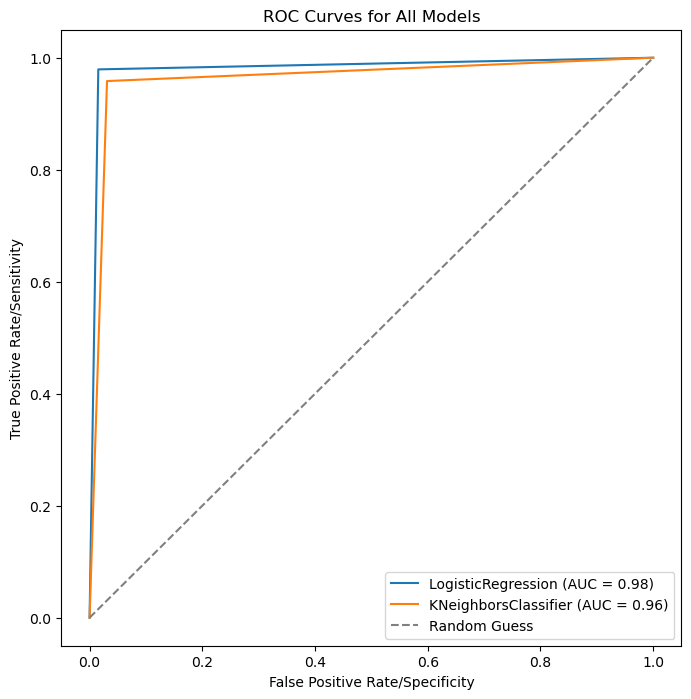

In [47]:
#ROC curves and AUC
from sklearn.metrics import roc_curve, auc

# define the list of models and their corresponding predictions
models = [('LogisticRegression', LR, pred1), ('KNeighborsClassifier', KNN, pred2)]

# plot the ROC curves for each model and calculate the AUC scores
plt.figure(figsize=(8,8))
for model in models:
    fpr, tpr, thresholds = roc_curve(y_valid, model[2])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model[0], roc_auc))

# set the plot labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate/Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')

plt.show()


<b> Comparison between Random Forest Classifier and LogisticRegression classifier</b> <br>
The logistics regression model and random forest modell have the same AUC of  0.98, However, the logistics regression model has a higher F1 score for both spam and non-spam email of 0.97 ans 0.98 respectively, as compared to the random forest model with 0.96 and 0.98 respectively. This makes the logistic regression a better model. The F1- score is used because we want a model that classify both spam and non-spam emails well as in real life we want a model to classify both email types.

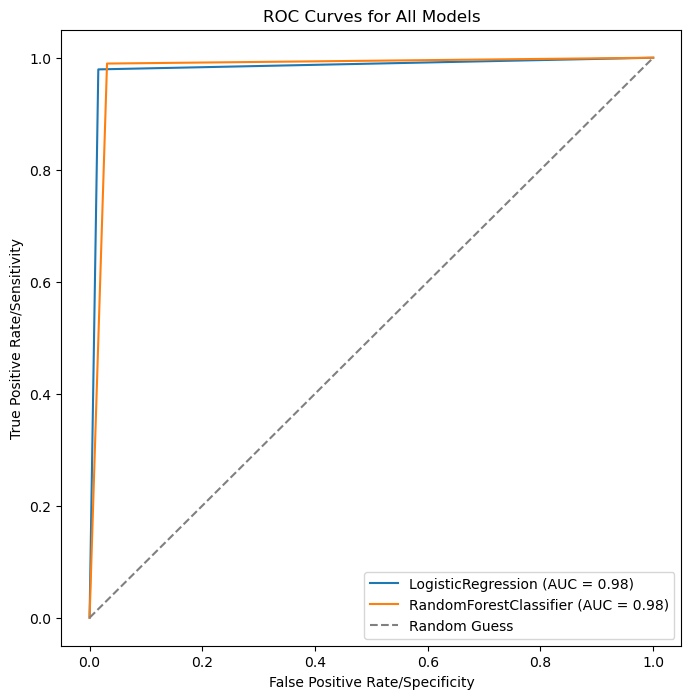

In [48]:
#ROC curves and AUC
from sklearn.metrics import roc_curve, auc

# define the list of models and their corresponding predictions
models = [ ('LogisticRegression', LR, pred1), ('RandomForestClassifier',RFC,pred3)]

# plot the ROC curves for each model and calculate the AUC scores
plt.figure(figsize=(8,8))
for model in models:
    fpr, tpr, thresholds = roc_curve(y_valid, model[2])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model[0], roc_auc))

# set the plot labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate/Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')

plt.show()


<b> Comparison between All the models 

The logistic regression model and random forest models have the highest AUC scores of 0.98.However, with further investigation using F1-score, reveals that the logistic regression model is a better classifier as it has a higher F1-score for both spam and ham emails. However, the random forest model has a recall of 0.99 for spam while the logistic regression model has a recall of 0.98, implying that slightly lower prediction for spam emails. But since we require a model that can predict both spam and non-spam emails well, the F1-score is the prefered metric. The logistic regression is therefore chosen as the most suitable model.

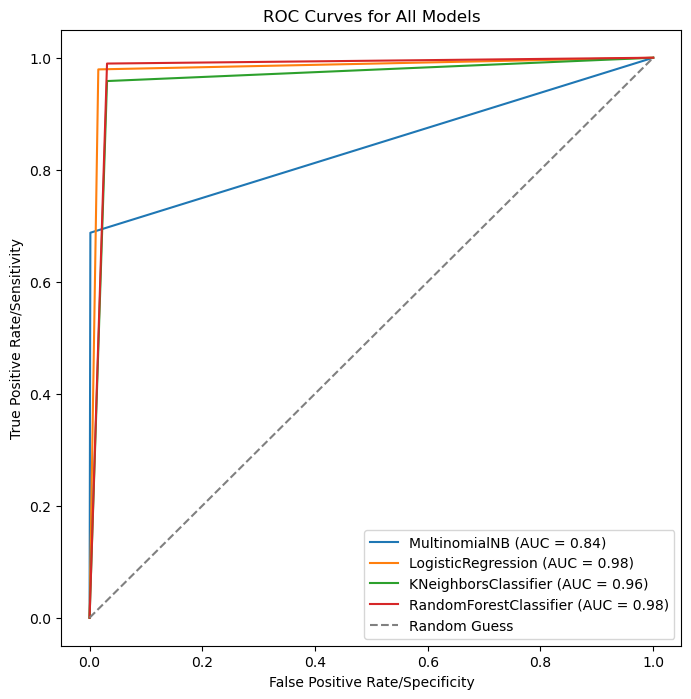

In [49]:
#ROC curves and AUC
from sklearn.metrics import roc_curve, auc

# define the list of models and their corresponding predictions
models = [('MultinomialNB', nb_classifier, pred), ('LogisticRegression', LR, pred1), ('KNeighborsClassifier', KNN, pred2),('RandomForestClassifier',RFC,pred3)]

# plot the ROC curves for each model and calculate the AUC scores
plt.figure(figsize=(8,8))
for model in models:
    fpr, tpr, thresholds = roc_curve(y_valid, model[2])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model[0], roc_auc))

# set the plot labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate/Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')

plt.show()


<b> Dealing with class imbalance in the Logistic Regression Model <br>
    
     The logistic regression model that doesnt take into account class imbalance also has better classifications for both spam and non-spam emails.The model accuracy for the new logistic regression model is 96 percent whhic is lower than the model that doesnt take the class imbalance into account (98%). The f1 score for the new model is lower for the spam and non-spam emails, with scores of 0.93 and 0.97 as compared to 0.97 and 0.99 in the previous model.  The new model predicts the spam emails better as it classifies all spam emails correctly as seen in the confusion matrix, but is has a lower accuracy in classifying non-spam emails with 42 not classified correctly as compared to the previous model with only 11 not classified correctly.The previous logistics regression model is a better model and is therefore selected as the final model
          

In [50]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model as LR_new
#we deal with class imbalance by using the class weight parameter
LR_new = LogisticRegression(class_weight='balanced', random_state=10,)

# create a new LR Classifier
LR_new.fit(tfidf_X_train, y_train)

#predict on the validation set
pred5 = LR_new.predict(tfidf_X_valid)
print(classification_report(y_valid,pred5))

print()

print('Confusion Matrix: \n', confusion_matrix(y_valid,pred5, labels = [0, 1] ))

print()

print('Accuracy:', accuracy_score(y_valid,pred5))






              precision    recall  f1-score   support

           0       1.00      0.94      0.97       711
           1       0.87      1.00      0.93       288

    accuracy                           0.96       999
   macro avg       0.94      0.97      0.95       999
weighted avg       0.96      0.96      0.96       999


Confusion Matrix: 
 [[669  42]
 [  0 288]]

Accuracy: 0.9579579579579579


##### 4.4. Model Evaluation

The Logistic regression model has an accuracy of 99 percent on the test data which is good performance.The F1-scores for both spam and non-spam emails are very good, recorded at 0.98 and 0.99 respectively. Even the recall of both email types is good (0.98 and 0.99), implyig that the model will make good classifications of both spam and non-spam emails. Given the good performance, there's no requirement to tune the model.

In [51]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model as LR
LR = LogisticRegression()

# create a LR Classifier
LR.fit(tfidf_X_train, y_train)

#predict on the test set
pred_test = LR.predict(tfidf_X_test)
print(classification_report(y_test,pred_test))

print()

print('Accuracy:', accuracy_score(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1060
           1       0.98      0.98      0.98       439

    accuracy                           0.99      1499
   macro avg       0.98      0.99      0.98      1499
weighted avg       0.99      0.99      0.99      1499


Accuracy: 0.9873248832555037


<b> Confusion Matrix Plot</b> <br>
The confusion matrix below shows that 430 of the 439 spam emails were correctly classified, with only 9 mis-classified. For the spam emails, 1050 of the 1060 non-spam emails were correctly classified, with only 10 mis-classified. This is a good model.


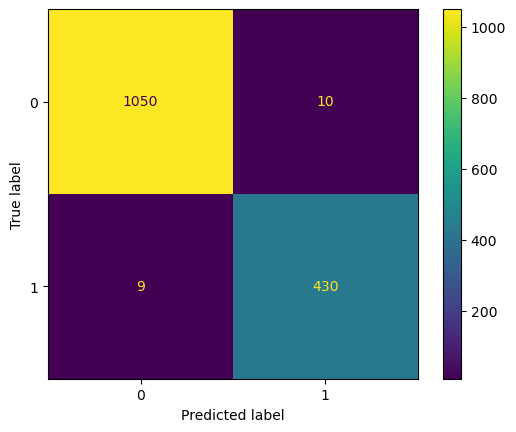

In [52]:

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_test)
plt.show()

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

<b> Logistic Regression Classifier ROC Curve</b> <br>
The ROC curve and AUC indicate that the model has very good performance as the AUC is almost at 1 and the ROC curve bends towards the very far top left corner of the graph.This model therefore has high sensitivity and specificity and can ably classify both spam and non-spam emails effectively.The model has very good performance and might therefore not require parameter tuning.

Text(0.5, 1.0, 'ROC Curve for Logistic Regression Classifier')

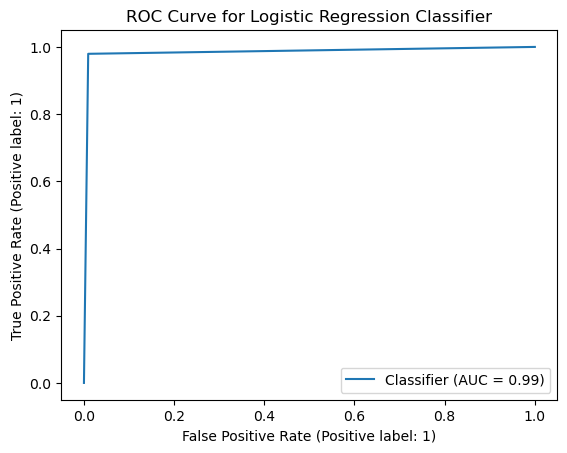

In [53]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,pred_test)
plt.title('ROC Curve for Logistic Regression Classifier')

#Source: sklearn website

<b> Implications</b> <br> This is a good classification model as it has a high ablity to classify both email types correctly on new email data. If deployed to production, it will have a high accuracy in predicting emails. <br>
However, since it is trained on data in a specific field, it might not perforom as well on emails from a company in a different domain as the common words might differ significantly. A different model might have to be trained on data in that domain.

In [54]:
#Saving the model to the disk using Pickle
import pickle

with open('model_LR', 'wb') as files:
    pickle.dump(LR, files)

##### 4.5. LImitations and Areas for future work
<b> Limitations<b/> <br>
    
- The dataset is biased as there is more data for non-spam emails than spam emails this usually causes bias in the model. With a stronger machine, more data could have been used for the analysis and down sampling done for the non-spam emails so as to have the same proportion of spam and non-spam emails. Nonetheless this issue was taken into consideration during analysis of the results by considering the recall and precision rather than relying on the model accuracy alone to assess performance.
 
- 
    
    


<b> Areas for future work<b/> <br>    
- Explore using a different word embedding techniques in the naive bayes model
- Use more data and down-sampe the non-spam emails so as to have a relatively equal proportion of non-spam and spam emails in the dataset.
- Explore different parameters of the different models (LR, RFC,KNN,NB) to see if their performance could have improved 
    
    


### 5.0. Bibliography

Ant, T. (2022, August 16). E-mail Classification NLP. Medium. https://medium.com/@tanerant/e-mail-classification-nlp-d7d7dfd76d8e  <br>

Computer Science (Director). (2019, August 8). Email Spam Detection Using Python & Machine Learning. https://www.youtube.com/watch?v=cNLPt02RwF0 <br>

Crescas, C. (2022, August 18). Creating a Spam Email Classifier using Python. Medium. https://medium.com/codex/creating-a-spam-email-classifier-using-python-245754443d71 <br>

Detecting Spam Emails Using Tensorflow in Python. (2022, October 7). GeeksforGeeks. https://www.geeksforgeeks.org/detecting-spam-emails-using-tensorflow-in-python/ <br>

gannestweb. (2022, June 7). How To Design A Spam Filtering System with Machine Learning Algorithm. Medium. https://towardsdatascience.com/email-spam-detection-1-2-b0e06a5c047 <br>

Logistic Regression 3-class Classifier. (n.d.). Scikit-Learn. Retrieved March 26, 2023, from https://scikit-learn/stable/auto_examples/linear_model/plot_iris_logistic.html  <br>

Ragab, A. (2022, April 7). Spam Email Classifier with KNN — From Scratch (Python). Medium. https://towardsdatascience.com/spam-email-classifier-with-knn-from-scratch-python-6e68eeb50a9e <br>

Sklearn.metrics.ConfusionMatrixDisplay. (n.d.). Scikit-Learn. Retrieved March 26, 2023, from https://scikit-learn/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html <br>

Spam or Ham? (n.d.). Retrieved March 21, 2023, from https://gtraskas.github.io/post/spamit/ <br>

Sundog Education with Frank Kane (Director). (2017, November 21). Implementing a Spam Classifier with Naive Bayes. https://www.youtube.com/watch?v=N-hJTaM9dEI <br>

The Enron-Spam datasets. (n.d.). Retrieved March 26, 2023, from https://www2.aueb.gr/users/ion/data/enron-spam/ <br>

Training and testing the “fake news” model with CountVectorizer | Python. (n.d.). Retrieved March 25, 2023, from https://campus.datacamp.com/courses/introduction-to-natural-language-processing-in-python/building-a-fake-news-classifier?ex=10 <br>

Yadav, K. (2022, November 8). Cleaning & Preprocessing Text Data by Building NLP Pipeline. Medium. https://towardsdatascience.com/cleaning-preprocessing-text-data-by-building-nlp-pipeline-853148add68a <br>

